# SIMPLE LINEAR REGRESI

In [1]:
# import Library dan package yang dibutuhkan
import numpy as np # untuk perhitungan scientific
import pandas as pd
import matplotlib.pyplot as plt # untuk plotting
from sklearn.linear_model import LinearRegression # untuk Library LinearRegression dari scikit-learn

In [2]:
# buat data
penjualan = np.array([6,5,5,4,4,3,2,2,2,1])
harga = np.array([16000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])

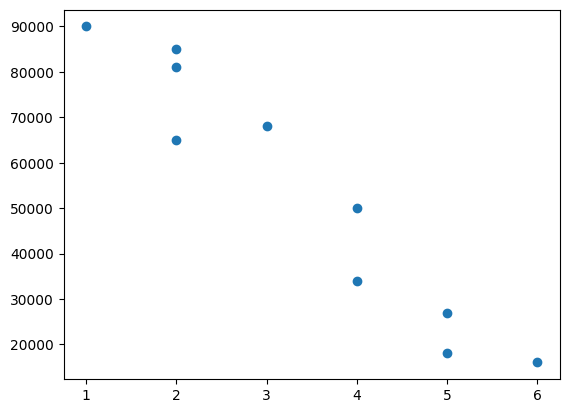

In [3]:
# buat plot
%matplotlib inline
plt.scatter (penjualan, harga)

In [4]:
# buat permodelan regresi

penjualan = penjualan.reshape (-1,1) # kita tukar baris dan kolom variabel ini, agar bisa dikalikan dalam operasi matriks
# untuk lebih lengkapnya baca teori soal perhitungan regresi linier

linreg = LinearRegression()
linreg.fit(penjualan, harga)

LinearRegression()

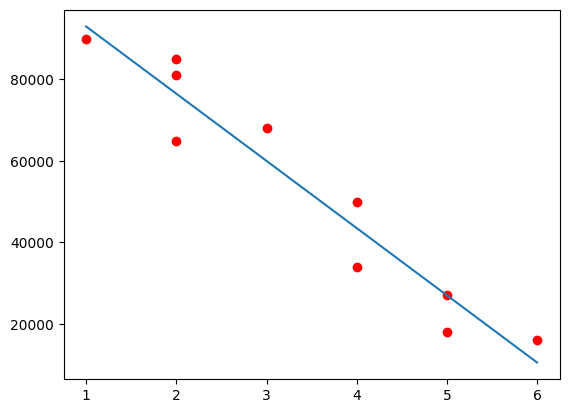

In [5]:
# Plot hasil regresi
plt.scatter(penjualan, harga, color = 'red')
plt.plot(penjualan, linreg.predict(penjualan))

## LATIHAN LINEAR REGRESI DENGAN DATASET

In [6]:
df = pd.read_csv (r"C:\Users\ihsan\Documents\IHSAN\KULIAH\SEMESTER_7\MACHINE_LEARNING\PROGRAM\PYTHON\Praktikum1\FuelConsumptionCo2.csv")
# Melihat 5 baris pertama data
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
# Kita ambil kolom mana saja yang akan kita analisis, dan membuang sisanya
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


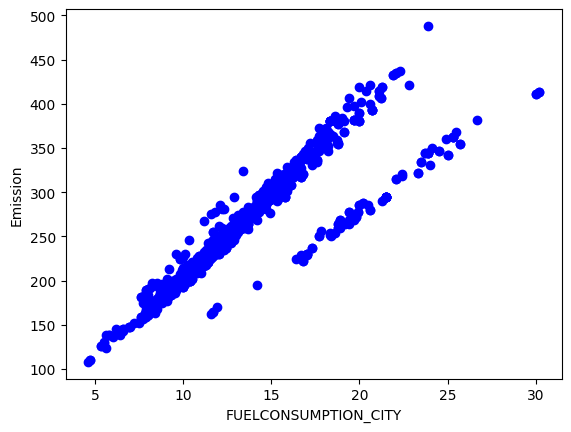

In [8]:
# Kita plot hubungannya
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='Blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")
plt.show()

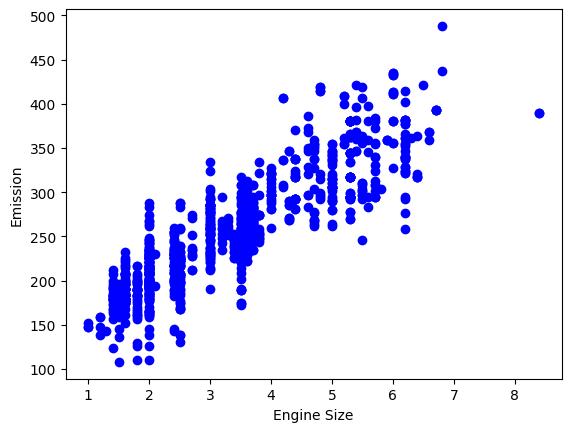

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='Blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [41]:
# Membagi data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

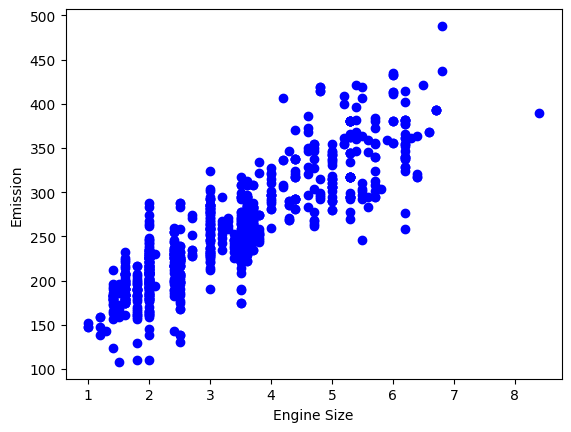

In [42]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'Blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

## Membuat Model Regresi

In [40]:
# Membuat Model Regresi
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# Koefisien model
print ('Coefficients', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients [[39.23577408]]
Intercept:  [125.00301832]


Text(0, 0.5, 'Emission')

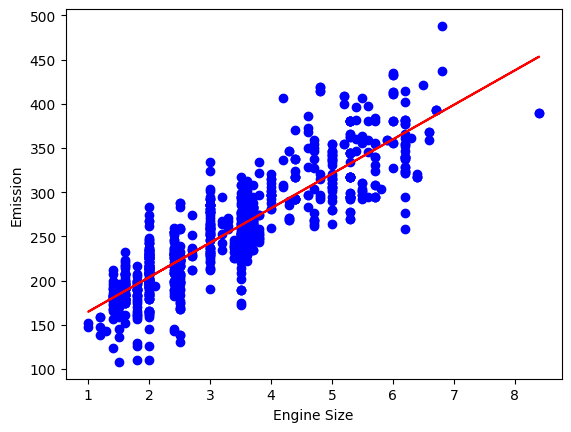

In [18]:
# Plot hasil regresi
plt.scatter (train.ENGINESIZE, train.CO2EMISSIONS, color='Blue')
plt.plot (train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel ("Engine Size")
plt.ylabel ("Emission")

In [19]:
# Menghitung Error
from sklearn.metrics import r2_score

test_x = np.asanyarray (test[['ENGINESIZE']])
test_y = np.asanyarray (test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print ("Mean absolute error : %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print ("Residual sum of squares (MSE) : %.2f" % np.mean((test_y_ - test_y) ** 2))
print ("R2-score : %.2f" % r2_score(test_y_, test_y))

Mean absolute error : 22.98
Residual sum of squares (MSE) : 932.17
R2-score : 0.66
